# 統計基礎① - 平均・分散・標準偏差

データ分析の基礎となる記述統計について学習します。
これらの統計量は、データの特徴を数値で要約する重要な指標です。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 日本語フォントの設定（複数の方法を試す）
try:
    import japanize_matplotlib
    print("japanize_matplotlib を使用")
except ImportError:
    # japanize_matplotlibがない場合の代替設定
    plt.rcParams['font.family'] = ['Arial Unicode MS', 'Hiragino Sans', 'Yu Gothic', 'Meiryo', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
    print("システムフォントを使用")

# 警告を抑制
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# Seabornの設定
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

japanize_matplotlib を使用


## 1. 中心傾向の測度（Measures of Central Tendency）

データの「中心」を表す指標について詳しく見ていきます。

### 1.1 平均（Mean）

In [2]:
# サンプルデータの生成
np.random.seed(42)
data = np.random.normal(100, 15, 1000)  # 平均100、標準偏差15の正規分布

# 平均の計算
mean_value = np.mean(data)
print(f"算術平均: {mean_value:.2f}")

# 手動計算での確認
manual_mean = sum(data) / len(data)
print(f"手動計算: {manual_mean:.2f}")

算術平均: 100.29
手動計算: 100.29


In [3]:
# 平均の性質：外れ値の影響
data_with_outlier = np.append(data, [500, 600])  # 外れ値を追加

mean_original = np.mean(data)
mean_with_outlier = np.mean(data_with_outlier)

print(f"元のデータの平均: {mean_original:.2f}")
print(f"外れ値ありの平均: {mean_with_outlier:.2f}")
print(f"差: {mean_with_outlier - mean_original:.2f}")

元のデータの平均: 100.29
外れ値ありの平均: 101.19
差: 0.90


### 1.2 中央値（Median）と最頻値（Mode）

In [4]:
# 中央値の計算
median_original = np.median(data)
median_with_outlier = np.median(data_with_outlier)

print(f"元のデータの中央値: {median_original:.2f}")
print(f"外れ値ありの中央値: {median_with_outlier:.2f}")
print(f"差: {median_with_outlier - median_original:.2f}")
print("\n→ 中央値は外れ値の影響を受けにくい")

元のデータの中央値: 100.38
外れ値ありの中央値: 100.40
差: 0.02

→ 中央値は外れ値の影響を受けにくい


In [5]:
# 離散データでの最頻値
discrete_data = np.random.randint(1, 10, 100)
mode_result = stats.mode(discrete_data, keepdims=True)
print(f"データ: {discrete_data[:20]}...")
print(f"最頻値: {mode_result.mode[0]}")
print(f"出現回数: {mode_result.count[0]}")

データ: [7 1 8 3 6 9 6 9 7 9 2 8 8 2 4 7 4 4 6 6]...
最頻値: 3
出現回数: 14


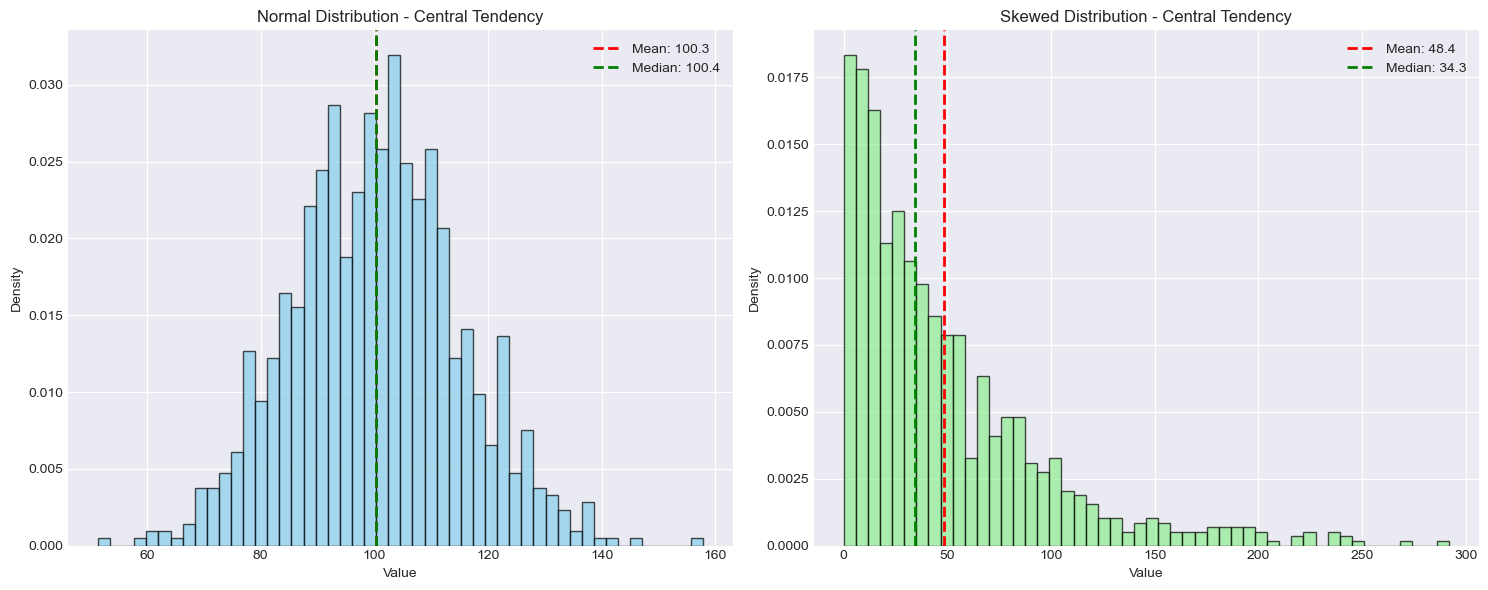

図の説明：
左: 正規分布では平均と中央値がほぼ同じ
右: 歪んだ分布では平均が中央値より大きくなる


In [6]:
# 3つの代表値の比較
# 日本語フォントの警告を回避するため、英語でラベル表示
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 正規分布の場合
axes[0].hist(data, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].axvline(mean_original, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_original:.1f}')
axes[0].axvline(median_original, color='green', linestyle='--', linewidth=2, label=f'Median: {median_original:.1f}')
axes[0].set_title('Normal Distribution - Central Tendency')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].legend()

# 歪んだ分布の場合
skewed_data = np.random.exponential(50, 1000)
axes[1].hist(skewed_data, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].axvline(np.mean(skewed_data), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(skewed_data):.1f}')
axes[1].axvline(np.median(skewed_data), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(skewed_data):.1f}')
axes[1].set_title('Skewed Distribution - Central Tendency')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()

# 日本語での説明をテキストで表示
print("図の説明：")
print("左: 正規分布では平均と中央値がほぼ同じ")
print("右: 歪んだ分布では平均が中央値より大きくなる")

## 2. 散布度の測度（Measures of Dispersion）

データの「ばらつき」を表す指標について学習します。

### 2.1 範囲と四分位範囲

In [11]:
# 基本的な散布度の指標
data_range = np.max(data) - np.min(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

print(f"最小値: {np.min(data):.2f}")
print(f"最大値: {np.max(data):.2f}")
print(f"範囲: {data_range:.2f}")
print(f"\n第1四分位数 (Q1): {q1:.2f}")
print(f"第3四分位数 (Q3): {q3:.2f}")
print(f"四分位範囲 (IQR): {iqr:.2f}")

最小値: 51.38
最大値: 157.79
範囲: 106.41

第1四分位数 (Q1): 90.29
第3四分位数 (Q3): 109.72
四分位範囲 (IQR): 19.43


/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_41350/2628438460.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=labels, patch_artist=True)
/opt/homebrew/Caskroom/miniconda/base/envs/ml-ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/envs/ml-ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAPH-7BB1}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/envs/ml-ai-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12402 (\N{HIRAGANA LETTER HI}) missing from font(s) Arial.
  fig.canva

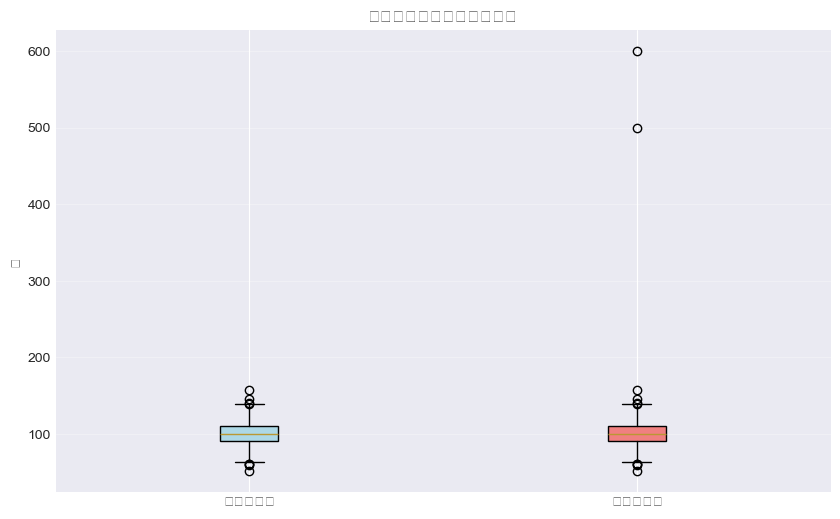

In [12]:
# 箱ひげ図で四分位数を視覚化
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# データを準備
box_data = [data, data_with_outlier]
labels = ['元のデータ', '外れ値あり']

# 箱ひげ図
bp = ax.boxplot(box_data, labels=labels, patch_artist=True)

# 色を設定
colors = ['lightblue', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_ylabel('値')
ax.set_title('箱ひげ図による分布の比較')
ax.grid(axis='y', alpha=0.3)

plt.show()

### 2.2 分散（Variance）

In [13]:
# 分散の計算過程を詳しく見る
sample_data = np.array([10, 20, 30, 40, 50])
mean_sample = np.mean(sample_data)

print("分散の計算過程:")
print(f"データ: {sample_data}")
print(f"平均: {mean_sample}")
print("\n各ステップ:")

# 偏差
deviations = sample_data - mean_sample
print(f"1. 偏差 (データ - 平均): {deviations}")

# 偏差の2乗
squared_deviations = deviations ** 2
print(f"2. 偏差の2乗: {squared_deviations}")

# 分散
variance = np.mean(squared_deviations)
print(f"3. 分散 (偏差の2乗の平均): {variance}")

# NumPyの関数で確認
print(f"\nnp.var()での計算: {np.var(sample_data)}")

分散の計算過程:
データ: [10 20 30 40 50]
平均: 30.0

各ステップ:
1. 偏差 (データ - 平均): [-20. -10.   0.  10.  20.]
2. 偏差の2乗: [400. 100.   0. 100. 400.]
3. 分散 (偏差の2乗の平均): 200.0

np.var()での計算: 200.0


In [14]:
# 標本分散と不偏分散
n = len(sample_data)

# 標本分散（母集団分散）
population_var = np.var(sample_data, ddof=0)
print(f"標本分散 (n で割る): {population_var}")

# 不偏分散
sample_var = np.var(sample_data, ddof=1)
print(f"不偏分散 (n-1 で割る): {sample_var}")

# NumPyのddofパラメータ
# ddof=0：標本分散（母集団分散の計算方法）- nで割る
# ddof=1：不偏分散 - (n-1)で割る
# ddofは「Delta Degrees of Freedom」の略で、分母から引く値を指定します。

# 手動計算での確認
manual_unbiased = np.sum(squared_deviations) / (n - 1)
print(f"\n手動計算の不偏分散: {manual_unbiased}")

標本分散 (n で割る): 200.0
不偏分散 (n-1 で割る): 250.0

手動計算の不偏分散: 250.0


## 不偏分散とは
不偏分散は、母集団の分散を推定するための統計量で、標本から計算される分散の修正版です。通常の標本分散よりも母集団の真の分散により近い値を与えるように設計されています。
## 計算式
### 標本分散（偏りのある分散）：
```s² = Σ(xi - x̄)² / n```
### 不偏分散：
```s² = Σ(xi - x̄)² / (n-1)```
ここで：

xi：各データ値
x̄：標本平均
n：標本サイズ

## なぜ(n-1)で割るのか
標本平均を使って分散を計算すると、どうしても母集団の分散より小さく見積もってしまう傾向があります。これは、標本平均が標本内のデータに最も近い値になるように計算されるためです。(n-1)で割ることで、この偏りを補正します。
この(n-1)は「自由度」と呼ばれ、平均を固定した場合に自由に動かせるデータの個数を表しています。

## 実用上の意味
標本サイズが大きくなると、nで割った値と(n-1)で割った値の差は小さくなりますが、特に小さな標本では不偏分散を使うことで、より正確な母集団の分散の推定ができます。統計的推定や仮説検定では、通常この不偏分散が使われます。再試行Claudeは間違えることがあります。回答内容を必ずご確認ください。リサーチ Sonnet 4

### 2.3 標準偏差（Standard Deviation）

In [15]:
# 標準偏差の計算
std_population = np.std(data, ddof=0)
std_sample = np.std(data, ddof=1)

print(f"標本標準偏差: {std_population:.2f}")
print(f"不偏標準偏差: {std_sample:.2f}")
print(f"\n分散との関係:")
print(f"√(標本分散) = √{np.var(data, ddof=0):.2f} = {np.sqrt(np.var(data, ddof=0)):.2f}")

標本標準偏差: 14.68
不偏標準偏差: 14.69

分散との関係:
√(標本分散) = √215.53 = 14.68


In [16]:
# 標準偏差の意味：68-95-99.7ルール
mean_data = np.mean(data)
std_data = np.std(data)

# 各範囲に含まれるデータの割合
within_1std = np.sum((data >= mean_data - std_data) & (data <= mean_data + std_data)) / len(data)
within_2std = np.sum((data >= mean_data - 2*std_data) & (data <= mean_data + 2*std_data)) / len(data)
within_3std = np.sum((data >= mean_data - 3*std_data) & (data <= mean_data + 3*std_data)) / len(data)

print("正規分布における標準偏差の範囲:")
print(f"平均 ± 1σ: {within_1std*100:.1f}% (理論値: 68.3%)")
print(f"平均 ± 2σ: {within_2std*100:.1f}% (理論値: 95.4%)")
print(f"平均 ± 3σ: {within_3std*100:.1f}% (理論値: 99.7%)")

正規分布における標準偏差の範囲:
平均 ± 1σ: 68.6% (理論値: 68.3%)
平均 ± 2σ: 95.6% (理論値: 95.4%)
平均 ± 3σ: 99.7% (理論値: 99.7%)


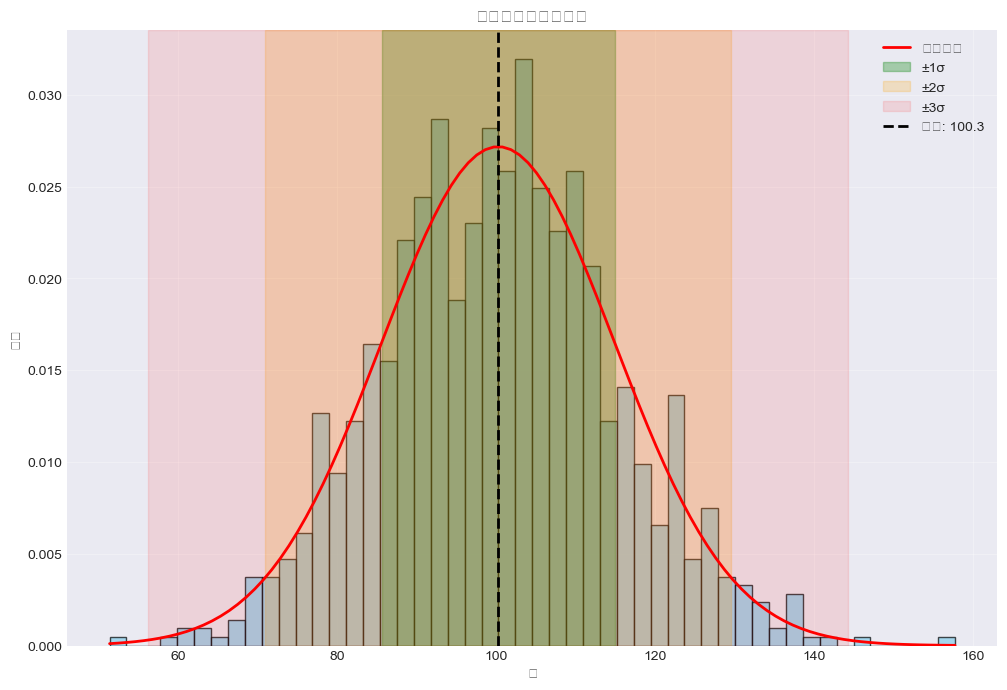

In [18]:
# 標準偏差の視覚化
fig, ax = plt.subplots(figsize=(12, 8))

# ヒストグラムと正規分布曲線
n, bins, patches = ax.hist(data, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# 理論的な正規分布
x = np.linspace(data.min(), data.max(), 100)
ax.plot(x, stats.norm.pdf(x, mean_data, std_data), 'r-', linewidth=2, label='正規分布')

# 標準偏差の範囲を表示
colors = ['green', 'orange', 'red']
alphas = [0.3, 0.2, 0.1]
labels = ['±1σ', '±2σ', '±3σ']

for i, (color, alpha, label) in enumerate(zip(colors, alphas, labels)):
    ax.axvspan(mean_data - (i+1)*std_data, mean_data + (i+1)*std_data, 
               alpha=alpha, color=color, label=label)

ax.axvline(mean_data, color='black', linestyle='--', linewidth=2, label=f'平均: {mean_data:.1f}')

ax.set_xlabel('値')
ax.set_ylabel('密度')
ax.set_title('正規分布と標準偏差')
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

## 3. 変動係数（Coefficient of Variation）

異なる単位や尺度のデータのばらつきを比較する指標です。

In [27]:
# 異なる尺度のデータを比較
# 身長データ（cm）
heights = np.random.normal(170, 10, 100)
# 体重データ（kg）
weights = np.random.normal(65, 8, 100)
# 年収データ（万円）
incomes = np.random.normal(500, 100, 100)

# 変動係数の計算
cv_height = np.std(heights) / np.mean(heights) * 100
cv_weight = np.std(weights) / np.mean(weights) * 100
cv_income = np.std(incomes) / np.mean(incomes) * 100

print("各データの統計量:")
print(f"身長 - 平均: {np.mean(heights):.1f}cm, 標準偏差: {np.std(heights):.1f}cm, CV: {cv_height:.1f}%")
print(f"体重 - 平均: {np.mean(weights):.1f}kg, 標準偏差: {np.std(weights):.1f}kg, CV: {cv_weight:.1f}%")
print(f"年収 - 平均: {np.mean(incomes):.1f}万円, 標準偏差: {np.std(incomes):.1f}万円, CV: {cv_income:.1f}%")
print("\n→ 変動係数で比較すると、年収が最もばらつきが大きい")

各データの統計量:
身長 - 平均: 171.0cm, 標準偏差: 11.3cm, CV: 6.6%
体重 - 平均: 65.7kg, 標準偏差: 7.6kg, CV: 11.6%
年収 - 平均: 517.6万円, 標準偏差: 91.5万円, CV: 17.7%

→ 変動係数で比較すると、年収が最もばらつきが大きい


## 4. 実践的な応用例

### 4.1 品質管理への応用

In [28]:
# 製造工程のデータシミュレーション
np.random.seed(42)

# 目標値: 100mm、許容誤差: ±3mm
target = 100
tolerance = 3

# 2つの製造ラインのデータ
line_A = np.random.normal(100, 0.8, 500)  # より精密
line_B = np.random.normal(100, 1.5, 500)  # ややばらつきが大きい

# 統計量の計算
stats_A = {
    '平均': np.mean(line_A),
    '標準偏差': np.std(line_A),
    '最小値': np.min(line_A),
    '最大値': np.max(line_A),
    '規格内率': np.sum((line_A >= target - tolerance) & (line_A <= target + tolerance)) / len(line_A) * 100
}

stats_B = {
    '平均': np.mean(line_B),
    '標準偏差': np.std(line_B),
    '最小値': np.min(line_B),
    '最大値': np.max(line_B),
    '規格内率': np.sum((line_B >= target - tolerance) & (line_B <= target + tolerance)) / len(line_B) * 100
}

# 結果の表示
df_stats = pd.DataFrame([stats_A, stats_B], index=['ラインA', 'ラインB'])
print("製造ライン比較:")
print(df_stats.round(2))

製造ライン比較:
          平均  標準偏差    最小値     最大値  規格内率
ラインA  100.01  0.78  97.41  103.08  99.8
ラインB  100.05  1.47  95.95  103.95  95.8


/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_30478/615491447.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 0].boxplot([line_A, line_B], labels=['ラインA', 'ラインB'], patch_artist=True)
/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_30478/615491447.py:48: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_30478/615491447.py:48: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_30478/615491447.py:48: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_30478/615491447.py:48: UserWarning:

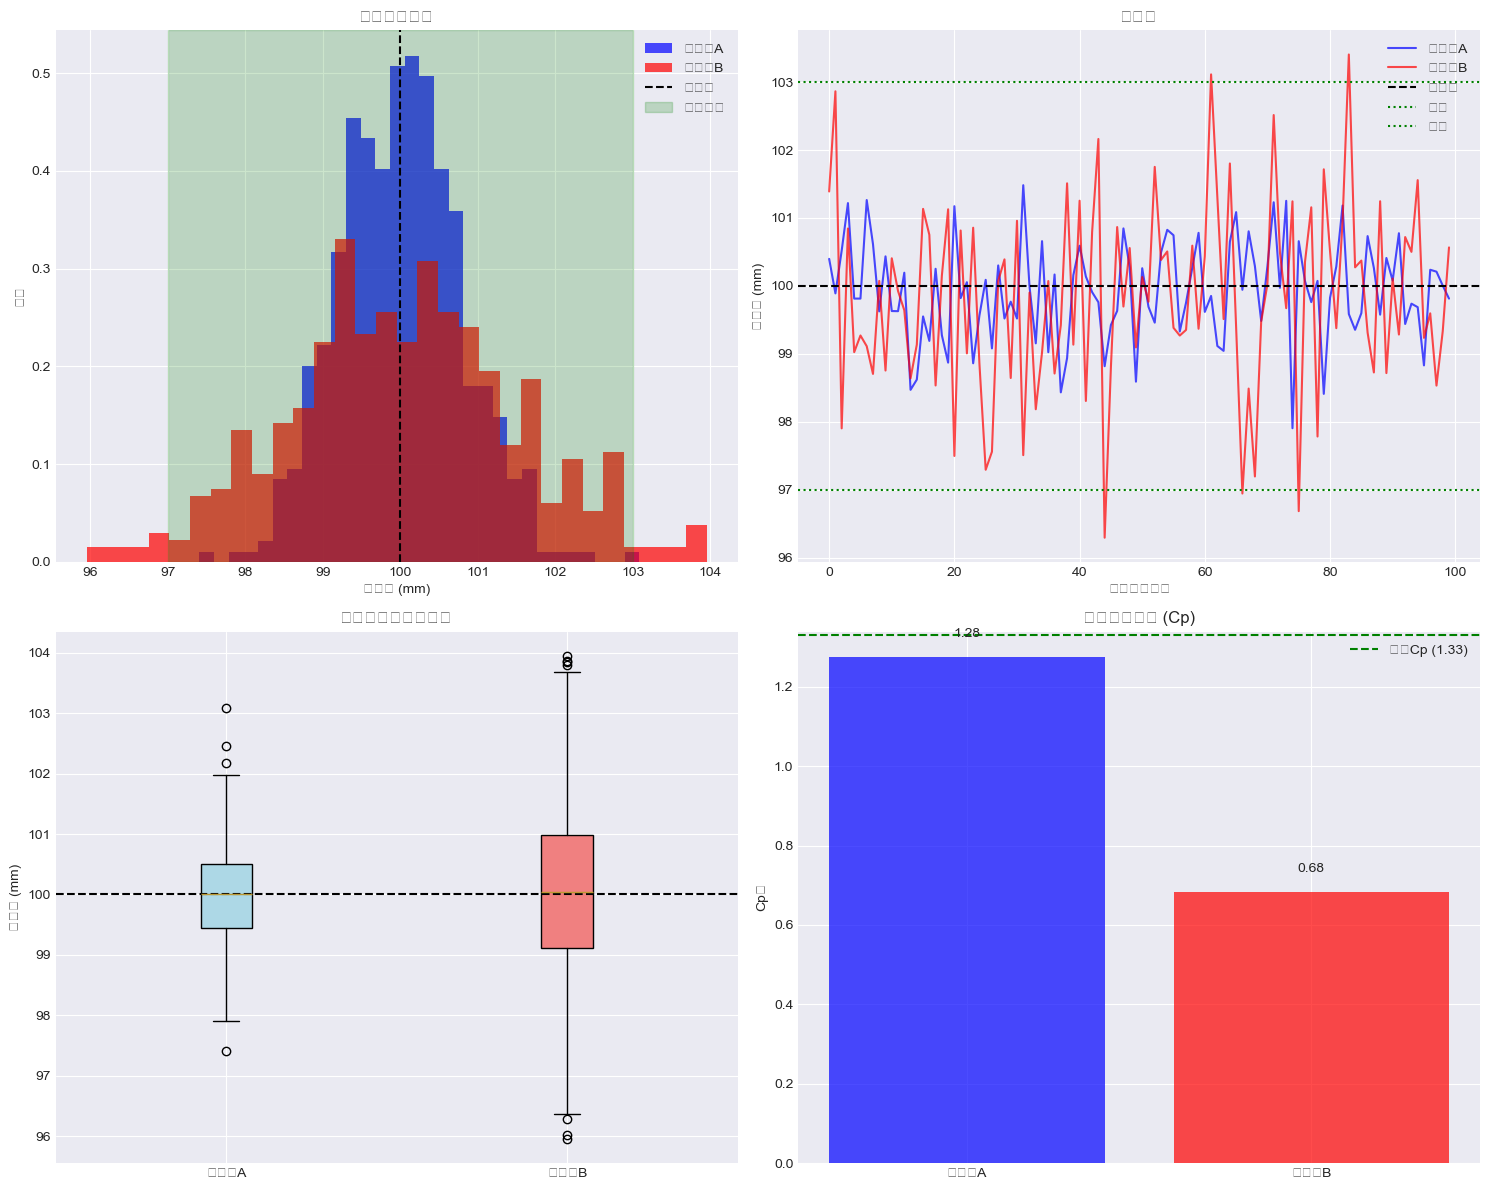

In [30]:
# 品質管理チャート
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ヒストグラム比較
axes[0, 0].hist(line_A, bins=30, alpha=0.7, color='blue', label='ラインA', density=True)
axes[0, 0].hist(line_B, bins=30, alpha=0.7, color='red', label='ラインB', density=True)
axes[0, 0].axvline(target, color='black', linestyle='--', label='目標値')
axes[0, 0].axvspan(target - tolerance, target + tolerance, alpha=0.2, color='green', label='許容範囲')
axes[0, 0].set_xlabel('測定値 (mm)')
axes[0, 0].set_ylabel('密度')
axes[0, 0].set_title('測定値の分布')
axes[0, 0].legend()

# 管理図（時系列）
sample_size = 100
axes[0, 1].plot(line_A[:sample_size], 'b-', alpha=0.7, label='ラインA')
axes[0, 1].plot(line_B[:sample_size], 'r-', alpha=0.7, label='ラインB')
axes[0, 1].axhline(target, color='black', linestyle='--', label='目標値')
axes[0, 1].axhline(target + tolerance, color='green', linestyle=':', label='上限')
axes[0, 1].axhline(target - tolerance, color='green', linestyle=':', label='下限')
axes[0, 1].set_xlabel('サンプル番号')
axes[0, 1].set_ylabel('測定値 (mm)')
axes[0, 1].set_title('管理図')
axes[0, 1].legend()

# 箱ひげ図
bp = axes[1, 0].boxplot([line_A, line_B], labels=['ラインA', 'ラインB'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightcoral')
axes[1, 0].axhline(target, color='black', linestyle='--', label='目標値')
axes[1, 0].set_ylabel('測定値 (mm)')
axes[1, 0].set_title('箱ひげ図による比較')

# 工程能力指数
# Cp = (USL - LSL) / (6 * σ)
cp_A = (2 * tolerance) / (6 * np.std(line_A))
cp_B = (2 * tolerance) / (6 * np.std(line_B))

axes[1, 1].bar(['ラインA', 'ラインB'], [cp_A, cp_B], color=['blue', 'red'], alpha=0.7)
axes[1, 1].axhline(1.33, color='green', linestyle='--', label='目標Cp (1.33)')
axes[1, 1].set_ylabel('Cp値')
axes[1, 1].set_title('工程能力指数 (Cp)')
axes[1, 1].legend()

for i, (label, value) in enumerate(zip(['ラインA', 'ラインB'], [cp_A, cp_B])):
    axes[1, 1].text(i, value + 0.05, f'{value:.2f}', ha='center')

plt.tight_layout()
plt.show()

### 4.2 金融リスク管理への応用

In [31]:
# 株式リターンのシミュレーション
np.random.seed(42)

# 3つの異なるリスク特性を持つ資産
days = 252  # 1年間の営業日

# 低リスク資産（債券的）
low_risk = np.random.normal(0.0002, 0.005, days)
# 中リスク資産（バランス型）
medium_risk = np.random.normal(0.0003, 0.01, days)
# 高リスク資産（成長株）
high_risk = np.random.normal(0.0005, 0.02, days)

# 累積リターン
cum_low = (1 + low_risk).cumprod()
cum_medium = (1 + medium_risk).cumprod()
cum_high = (1 + high_risk).cumprod()

# リスク・リターン分析
assets = {
    '低リスク': {'returns': low_risk, 'cumulative': cum_low},
    '中リスク': {'returns': medium_risk, 'cumulative': cum_medium},
    '高リスク': {'returns': high_risk, 'cumulative': cum_high}
}

# 統計量の計算
results = []
for name, data in assets.items():
    annual_return = (data['cumulative'][-1] - 1) * 100
    annual_std = np.std(data['returns']) * np.sqrt(252) * 100
    sharpe_ratio = (np.mean(data['returns']) * 252) / (np.std(data['returns']) * np.sqrt(252))
    
    results.append({
        '資産': name,
        '年率リターン(%)': annual_return,
        '年率標準偏差(%)': annual_std,
        'シャープレシオ': sharpe_ratio
    })

df_results = pd.DataFrame(results)
print("リスク・リターン分析:")
print(df_results.round(2))

リスク・リターン分析:
     資産  年率リターン(%)  年率標準偏差(%)  シャープレシオ
0  低リスク       4.36       7.66     0.60
1  中リスク      13.50      15.88     0.88
2  高リスク     -26.73      31.57    -0.83


/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_30478/982520491.py:51: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_30478/982520491.py:51: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_30478/982520491.py:51: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_30478/982520491.py:51: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_30478/982520491.py:51: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_3047

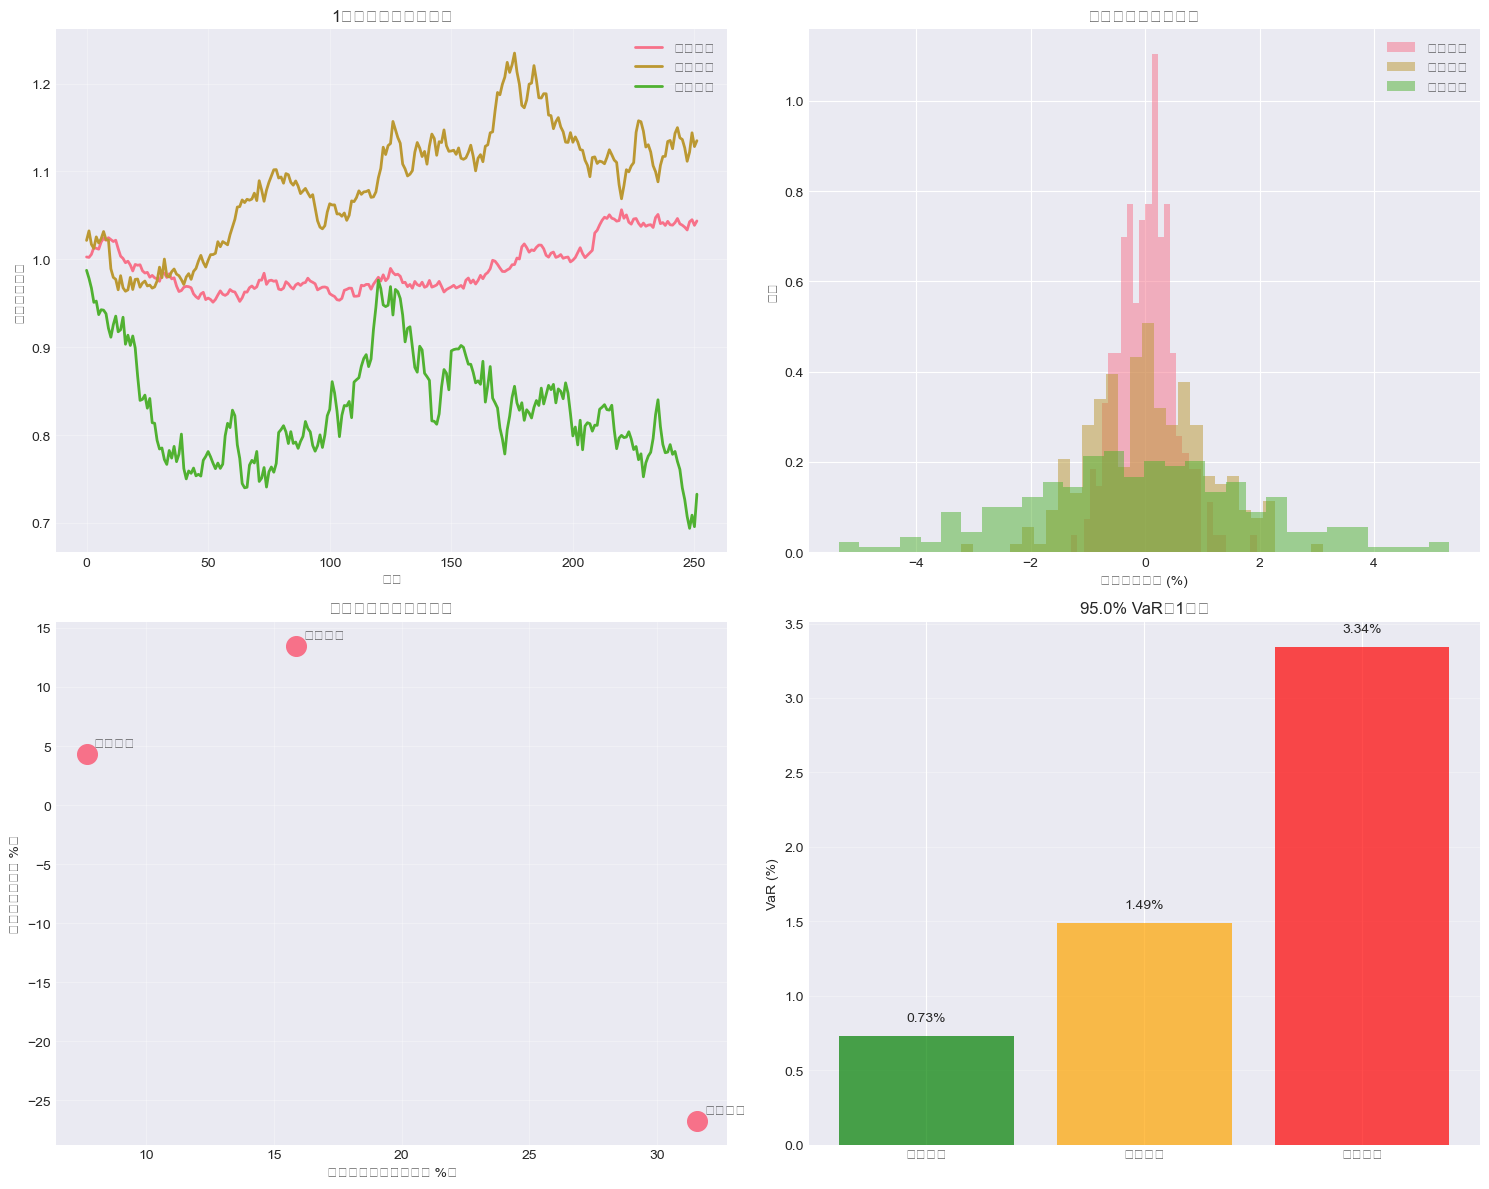

In [32]:
# リスク・リターンの視覚化
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 累積リターン
axes[0, 0].plot(cum_low, label='低リスク', linewidth=2)
axes[0, 0].plot(cum_medium, label='中リスク', linewidth=2)
axes[0, 0].plot(cum_high, label='高リスク', linewidth=2)
axes[0, 0].set_xlabel('日数')
axes[0, 0].set_ylabel('累積リターン')
axes[0, 0].set_title('1年間の累積リターン')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# リターンの分布
axes[0, 1].hist(low_risk * 100, bins=30, alpha=0.5, label='低リスク', density=True)
axes[0, 1].hist(medium_risk * 100, bins=30, alpha=0.5, label='中リスク', density=True)
axes[0, 1].hist(high_risk * 100, bins=30, alpha=0.5, label='高リスク', density=True)
axes[0, 1].set_xlabel('日次リターン (%)')
axes[0, 1].set_ylabel('密度')
axes[0, 1].set_title('日次リターンの分布')
axes[0, 1].legend()

# リスク・リターン散布図
axes[1, 0].scatter(df_results['年率標準偏差(%)'], df_results['年率リターン(%)'], s=200)
for idx, row in df_results.iterrows():
    axes[1, 0].annotate(row['資産'], 
                        (row['年率標準偏差(%)'], row['年率リターン(%)']),
                        xytext=(5, 5), textcoords='offset points')
axes[1, 0].set_xlabel('リスク（年率標準偏差 %）')
axes[1, 0].set_ylabel('リターン（年率 %）')
axes[1, 0].set_title('リスク・リターン分析')
axes[1, 0].grid(True, alpha=0.3)

# VaR（Value at Risk）分析
confidence_level = 0.95
var_low = np.percentile(low_risk, (1 - confidence_level) * 100) * 100
var_medium = np.percentile(medium_risk, (1 - confidence_level) * 100) * 100
var_high = np.percentile(high_risk, (1 - confidence_level) * 100) * 100

axes[1, 1].bar(['低リスク', '中リスク', '高リスク'], 
               [-var_low, -var_medium, -var_high],
               color=['green', 'orange', 'red'], alpha=0.7)
axes[1, 1].set_ylabel('VaR (%)')
axes[1, 1].set_title(f'{confidence_level*100}% VaR（1日）')
axes[1, 1].grid(axis='y', alpha=0.3)

for i, (label, value) in enumerate(zip(['低リスク', '中リスク', '高リスク'], 
                                        [-var_low, -var_medium, -var_high])):
    axes[1, 1].text(i, value + 0.1, f'{value:.2f}%', ha='center')

plt.tight_layout()
plt.show()

## 練習問題

### 問題1: A/Bテストの分析
ウェブサイトの2つのデザイン（AとB）のコンバージョン率を比較します。

In [ ]:
# A/Bテストのデータ生成
np.random.seed(42)

# デザインA: 平均3.5%のコンバージョン率
design_A = np.random.binomial(1, 0.035, 1000)
# デザインB: 平均4.2%のコンバージョン率
design_B = np.random.binomial(1, 0.042, 1000)

# ここに解答を書いてください
# 1. 各デザインのコンバージョン率を計算

# 2. 標準誤差を計算（二項分布の標準誤差: sqrt(p(1-p)/n)）

# 3. 95%信頼区間を計算

# 4. 結果を視覚化（棒グラフと信頼区間）


### 問題2: センサーデータの異常検知
工場のセンサーデータから異常値を検出します。

In [ ]:
# センサーデータの生成（正常値 + 異常値）
np.random.seed(42)
normal_data = np.random.normal(50, 5, 480)  # 正常データ
anomalies = np.random.uniform(70, 90, 20)   # 異常データ
sensor_data = np.concatenate([normal_data, anomalies])
np.random.shuffle(sensor_data)

# ここに解答を書いてください
# 1. 基本統計量（平均、標準偏差）を計算

# 2. 3σルールで異常値を検出

# 3. IQRルールで異常値を検出

# 4. 両方の手法の結果を比較・視覚化


## まとめ

今日学んだ統計の基礎概念：

1. **中心傾向の測度**
   - 平均（Mean）: データの重心
   - 中央値（Median）: 順序の中央
   - 最頻値（Mode）: 最も頻繁な値

2. **散布度の測度**
   - 範囲（Range）: 最大値 - 最小値
   - 四分位範囲（IQR）: Q3 - Q1
   - 分散（Variance）: 偏差の2乗の平均
   - 標準偏差（Standard Deviation）: 分散の平方根

3. **応用**
   - 品質管理: 工程能力指数、管理図
   - 金融分析: リスク評価、VaR
   - 異常検知: 3σルール、IQRルール

これらの統計量は、データの特徴を定量的に理解し、
意思決定を行うための重要な基礎となります。